## Model selection using cross validation

When solving a machine learning or data science problem, there are usually many different models to solve a same problem. For example, both neural network model and linear regression models can be used for a regression problem. The question is which is the best model among the models applied for solving the problem. Model selection is to find the best model from those methods applied to the problem at hand. There are various sorts of approaches for model selection. Cross validation is one method which can be used for model selection. 

This tutorial is to demonstrate how to use cross validation for model selection. We will use linear regression to demonstrate the CV method. We use polynomial regression model with different degrees to fit to a data, and the aim is to find what is the best degree for the data.

The following imported modules will be used for our experiments

In [2]:
import pandas as pd
import matplotlib.pyplot
import numpy as np

## get input output vectors from the data frame and plot the data
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

The data to be used are stored in the file `polynomial_data.csv`. In the file, the are two columns: the first column are the independent feature values $x$, and the second column are the target values $y$. Our aim is to find a function $f$ so that $y=f(x)$. We want to fit a polynomial function. Precisely, we want to fit $d$th order polynomials which are given by
$$\hat y = w_0 + \sum_{i = 1}^d w_i x^i$$
In this model, the degree $d$ could be any non-negative integer value $1,2,3,\cdots$. Our aim is to find the best $d$.

In [3]:
data = np.genfromtxt('polynomial_data.csv', delimiter=',')
data

array([[ 4.55580542e+00, -2.09601001e+02],
       [-4.72413767e+00,  2.89109007e+02],
       [-4.53748313e+00,  2.44260920e+02],
       [-2.72529382e+00,  5.63565410e+01],
       [-7.20542341e-01,  3.99650562e-01],
       [-2.78203767e+00,  6.21180926e+01],
       [-3.88129352e+00,  1.52176167e+02],
       [-9.41527267e-01,  1.44556372e+01],
       [ 2.37466229e+00, -2.20375829e+01],
       [ 3.60889637e+00, -1.08856402e+02],
       [-3.04757050e+00,  6.90686767e+01],
       [-4.96534591e+00,  3.33011176e+02],
       [ 7.65004938e-01,  1.16348851e+01],
       [-4.54639447e+00,  2.45934457e+02],
       [ 2.25685066e+00, -6.15712362e+00],
       [ 2.87397107e+00, -6.48156506e+01],
       [-2.05755741e-01,  1.27456445e+00],
       [ 1.24123126e+00, -7.82497376e+00],
       [-2.63902065e+00,  5.77815291e+01],
       [-1.47472285e+00,  2.10206089e+01],
       [-1.63467848e+00,  1.36902347e+01],
       [ 1.44379072e+00,  6.04289922e+00],
       [-1.90968720e+00,  6.83364447e+00],
       [-4.

In [4]:
#plt.scatter(data[:,0],data[:,1])
print(data.shape)

(500, 2)


Use $X$ to store the feature data, and $Y$ the response values.

In [5]:
X = data[:,0]
Y = data[:,1]

To use polynomial function to represent the model, we need the following function to generate new feature data which are generated by using $x^1,x^2,\cdots,x^d$.

In [6]:
def getPolynomialDataMatrix(x, degree):
    X = np.ones(x.shape)
    for i in range(1,degree + 1):
        X = np.column_stack((X, x ** i))
    return X
    
print(getPolynomialDataMatrix(X, 4))

[[ 1.00000000e+00  4.55580542e+00  2.07553630e+01  9.45573954e+01
   4.30785094e+02]
 [ 1.00000000e+00 -4.72413767e+00  2.23174767e+01 -1.05430832e+02
   4.98069767e+02]
 [ 1.00000000e+00 -4.53748313e+00  2.05887532e+01 -9.34211204e+01
   4.23896758e+02]
 ...
 [ 1.00000000e+00  2.59737467e-01  6.74635515e-02  1.75228120e-02
   4.55133078e-03]
 [ 1.00000000e+00 -1.37259390e+00  1.88401400e+00 -2.58598612e+00
   3.54950876e+00]
 [ 1.00000000e+00 -1.74930543e+00  3.06006950e+00 -5.35299621e+00
   9.36402536e+00]]


## Cross validation approach to model selection

In the following, design your code to use CV for finding the best $d$ using the data. The idea is described following and so you can design your own code. For each degree $d$, firstly you can generate the feature data using the function `getPolynomialDataMatrix()`; secondly, you can use `KFold` to split the data into `k` groups, e.g., `k=5`; thirdly, use the cross validation to train linear regression models and produce Mean Squared Errors using the test data in each fold. After you have done the procedure, report the mean MSE for each fold and as well as the standard deviation values. Can you tell which degree $d$ was the best model?

In [8]:
def train_cv(X,y,n_splits=5,shuffle=True):
    k_fold = KFold(n_splits = n_splits, shuffle=shuffle)
    k_fold.get_n_splits(X)

    MSE = []
    for train_index, test_index in k_fold.split(X):
        print('Train:', train_index, 'test', test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # train the model, polynomial regression is a linear model
        # create a LR object
        reg_model = linear_model.LinearRegression()
        # Train the model using training data
        reg_model.fit(X_train, y_train)
        # Make predictions over test data
        y_test_pred = reg_model.predict(X_test)
        MSE.append(mean_squared_error(y_test, y_test_pred))
        print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
    return MSE

# n_splits = 5        
# mse = train_cv(X,Y,n_splits=5)
# print(mse)

In [9]:
def model_selection_cv(X,Y):
    test_MSE = []
    for degree in range(1,10):
        features = getPolynomialDataMatrix(X, degree)
        mse = train_cv(features,Y,n_splits=5)
        test_MSE.append(mse)
        
    return test_MSE

test_MSE = np.array(model_selection_cv(X,Y))

Train: [  0   1   2   3   4   8  10  12  14  15  16  17  19  20  21  22  23  24
  25  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  48  49  50  51  52  53  54  55  57  58  59  61  62  63  65
  68  69  70  71  73  74  75  76  77  79  80  82  83  84  86  87  88  89
  90  91  92  93  94  95  97  98 100 101 102 103 104 105 107 108 109 111
 112 113 114 115 117 119 120 121 122 123 124 127 130 131 132 133 134 135
 136 137 138 140 141 142 143 144 145 147 148 149 150 152 153 154 155 158
 159 160 161 162 163 165 166 167 168 169 170 171 174 175 176 179 180 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 198 199 201 202
 203 204 205 206 207 208 209 210 211 212 213 216 217 218 219 221 222 223
 224 225 226 227 229 230 231 232 233 234 235 236 238 239 240 241 242 243
 244 245 248 250 251 253 254 255 256 257 258 259 261 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 278 279 280 281 282 283 285 286 287
 288 289 290 291 292 293 294 295 296 297 298

(9, 5)
[2083.48697023 1940.08511212   93.66319827   94.07369551   94.47199917
   94.35333736   94.40128609   96.64127148   96.04932601]
[343.20588209  85.54732833  11.11737831  20.20202865   9.65951046
  13.50829172  15.56253977  18.03583808   7.36474653]


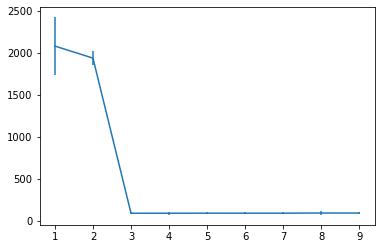

In [10]:
print(test_MSE.shape)
print(np.mean(test_MSE,axis=1))
print(np.std(test_MSE,axis=1))
x_axis = 1+np.arange(9)
plt.errorbar(x_axis,np.mean(test_MSE,axis=1),np.std(test_MSE,axis=1))
plt.show()